In [87]:
import numpy as np
import pickle
import torch
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
with open('res_funnel/res_nuts.pickle', 'rb') as handle:
    res_nuts = pickle.load(handle)
with open('res_funnel/adaptive_isir.pickle', 'rb') as handle:
    res_adapt_isir = pickle.load(handle)
with open('res_funnel/res_ex2.pickle', 'rb') as handle:
    res_ex2 = pickle.load(handle)
with open('res_funnel/res_isir.pickle', 'rb') as handle:
    res_isir = pickle.load(handle)
with open('res_funnel/res_flex.pickle', 'rb') as handle:
    res_flex = pickle.load(handle)

In [89]:
time_nuts = res_nuts["time"]
print("Time NUTS:")
print("dim = 10: ", np.asarray(time_nuts[::5]).mean())
print("dim = 20: ", np.asarray(time_nuts[1::5]).mean())
print("dim = 50: ", np.asarray(time_nuts[2::5]).mean())
print("dim = 100: ", np.asarray(time_nuts[3::5]).mean())
print("dim = 200: ", np.asarray(time_nuts[4::5]).mean())

Time NUTS:
dim = 10:  33.40155521869659
dim = 20:  41.070420322418215
dim = 50:  61.620625553131106
dim = 100:  82.27686959266663
dim = 200:  88.45999939918518


In [90]:
time_flex = res_flex["time"]
print("Time NUTS:")
print("dim = 10: ", np.asarray(time_flex[::5]).mean())
print("dim = 20: ", np.asarray(time_flex[1::5]).mean())
print("dim = 50: ", np.asarray(time_flex[2::5]).mean())
print("dim = 100: ", np.asarray(time_flex[3::5]).mean())
print("dim = 200: ", np.asarray(time_flex[4::5]).mean())

Time NUTS:
dim = 10:  46.7852072763443
dim = 20:  48.2240731716156
dim = 50:  54.22768952846527
dim = 100:  68.8645712184906
dim = 200:  89.55905684471131


In [91]:
time_adapt_isir = res_adapt_isir["time"]
print("Time NUTS:")
print("dim = 10: ", np.asarray(time_adapt_isir[::5]).mean())
print("dim = 20: ", np.asarray(time_adapt_isir[1::5]).mean())
print("dim = 50: ", np.asarray(time_adapt_isir[2::5]).mean())
print("dim = 100: ", np.asarray(time_adapt_isir[3::5]).mean())
print("dim = 200: ", np.asarray(time_adapt_isir[4::5]).mean())

Time NUTS:
dim = 10:  38.09386785507202
dim = 20:  39.422190780639646
dim = 50:  45.27399920940399
dim = 100:  59.78010819911957
dim = 200:  80.37637738704682


In [92]:
(np.asarray(res_adapt_isir["ess"]).flatten()[3::5]).mean()

0.38114735

In [93]:
(np.asarray(res_nuts["ess"]).flatten()[3::5]).mean()

0.27656162

In [94]:
(np.asarray(res_flex["ess"]).flatten()[3::5]).mean()

0.36762634

In [95]:
dims = [10,20,50,100,200]
major_xticks = dims

In [96]:
keywords = ["ess","tv","emd"]
av_nuts = {"ess":[],"tv":[],"emd":[]}
av_isir = {"ess":[],"tv":[],"emd":[]}
av_adapt_isir = {"ess":[],"tv":[],"emd":[]}
av_flex = {"ess":[],"tv":[],"emd":[]}
av_ex2 = {"ess":[],"tv":[],"emd":[]}

In [97]:
for i in range(len(dims)):
    for key in keywords:
        av_nuts[key].append(np.asarray(res_nuts[key]).flatten()[i::5].mean())
        av_isir[key].append(np.asarray(res_isir[key]).flatten()[i::5].mean())
        av_adapt_isir[key].append(np.asarray(res_adapt_isir[key]).flatten()[i::5].mean())
        av_flex[key].append(np.asarray(res_flex[key]).flatten()[i::5].mean())
        av_ex2[key].append(np.asarray(res_ex2[key]).flatten()[i::5].mean())

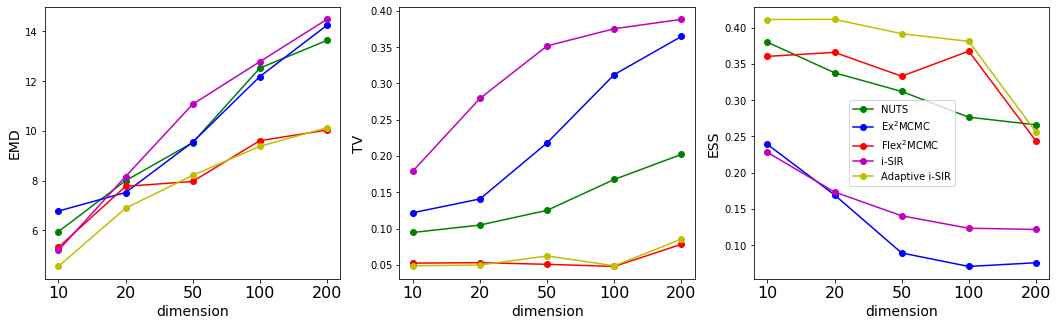

In [98]:
fig,ax = plt.subplots(1,3,figsize=(18,5))
#i-sir plots
ax[0].plot(np.arange(len(dims)),np.asarray(av_nuts["emd"])/np.asarray(dims),marker="o",c='g',label="NUTS")
ax[0].plot(np.arange(len(dims)),np.asarray(av_ex2["emd"])/np.asarray(dims),marker="o",c='b',label="Ex$^2$MCMC")
ax[0].plot(np.arange(len(dims)),np.asarray(av_flex["emd"])/np.asarray(dims),marker="o",c='r',label="Flex$^2$MCMC")
ax[0].plot(np.arange(len(dims)),np.asarray(av_isir["emd"])/np.asarray(dims),marker="o",c='m',label="i-SIR")
ax[0].plot(np.arange(len(dims)),np.asarray(av_adapt_isir["emd"])/np.asarray(dims),marker="o",c='y',label="Adaptive i-SIR")
#ax[0].fill_between(
#            dims,
#            np.amin(mean_isir,axis=0),
#            np.amax(mean_isir,axis=0),
#            alpha=0.2,
#            color = 'b'
#        )
#ax[0].fill_between(
#            dims,
#            np.amin(mean_ex2,axis=0),
#            np.amax(mean_ex2,axis=0),
#            alpha=0.2,
#            color = 'r'
#        )
#ax[0].set_title('Mean confidence intervals')
#ax[0].set_xticks(dims,fontsize=14)
ax[0].set_xlabel('dimension',fontsize=14)
ax[0].set_xticks(np.arange(len(dims)),major_xticks, fontsize=16)
ax[0].set_ylabel('EMD',fontsize=14)
#mala samples
ax[1].plot(np.arange(len(dims)),np.asarray(av_nuts["tv"]),marker="o",c='g',label="NUTS")
ax[1].plot(np.arange(len(dims)),np.asarray(av_ex2["tv"]),marker="o",c='b',label="Ex$^2$MCMC")
ax[1].plot(np.arange(len(dims)),np.asarray(av_flex["tv"]),marker="o",c='r',label="Flex$^2$MCMC")
ax[1].plot(np.arange(len(dims)),np.asarray(av_isir["tv"]),marker="o",c='m',label="i-SIR")
ax[1].plot(np.arange(len(dims)),np.asarray(av_adapt_isir["tv"]),marker="o",c='y',label="Adaptive i-SIR")
#ax[1].fill_between(
#            dims,
#            np.amin(emd_isir/dims,axis=0),
#            np.amax(emd_isir/dims,axis=0),
#            alpha=0.2,
#            color = 'b'
#        )
#ax[1].fill_between(
#            dims,
#            np.amin(emd_ex2/dims,axis=0),
#            np.amax(emd_ex2/dims,axis=0),
#            alpha=0.2,
#            color = 'r'
#        )
#ax[1].set_title('EMD distance')
#ax[1].set_xticks(dims,fontsize=14)
ax[1].set_xticks(np.arange(len(dims)),major_xticks, fontsize=16)
ax[1].set_xlabel('dimension',fontsize=14)
ax[1].set_ylabel('TV',fontsize=14)
#ex2-mcmc samples
ax[2].plot(np.arange(len(dims)),np.asarray(av_nuts["ess"]),marker="o",c='g',label="NUTS")
ax[2].plot(np.arange(len(dims)),np.asarray(av_ex2["ess"]),marker="o",c='b',label="Ex$^2$MCMC")
ax[2].plot(np.arange(len(dims)),np.asarray(av_flex["ess"]),marker="o",c='r',label="Flex$^2$MCMC")
ax[2].plot(np.arange(len(dims)),np.asarray(av_isir["ess"]),marker="o",c='m',label="i-SIR")
ax[2].plot(np.arange(len(dims)),np.asarray(av_adapt_isir["ess"]),marker="o",c='y',label="Adaptive i-SIR")
#ax[2].fill_between(
#            dims,
#            np.amin(ess_isir,axis=0),
#            ess_isir.mean(axis=0) + ess_isir.mean(axis=0) - np.amin(ess_isir,axis=0),
#            alpha=0.2,
#            color = 'b'
#        )
#ax[2].fill_between(
#            dims,
#            np.amin(ess_ex2,axis=0),
#            ess_ex2.mean(axis=0) + ess_ex2.mean(axis=0) - np.amin(ess_ex2,axis=0),
#            alpha=0.2,
#            color = 'r'
#        )
#ax[2].set_title('EMD')
#ax[2].set_xticks(dims,fontsize=14)
ax[2].set_xticks(np.arange(len(dims)),major_xticks, fontsize=16)
ax[2].set_xlabel('dimension',fontsize=14)
ax[2].set_ylabel('ESS',fontsize=14)
ax[2].legend(fontsize = 10)
#plt.savefig("multidim_gaus_example.pdf", format="pdf", bbox_inches="tight") 
plt.show()